((891, 6), (891,))

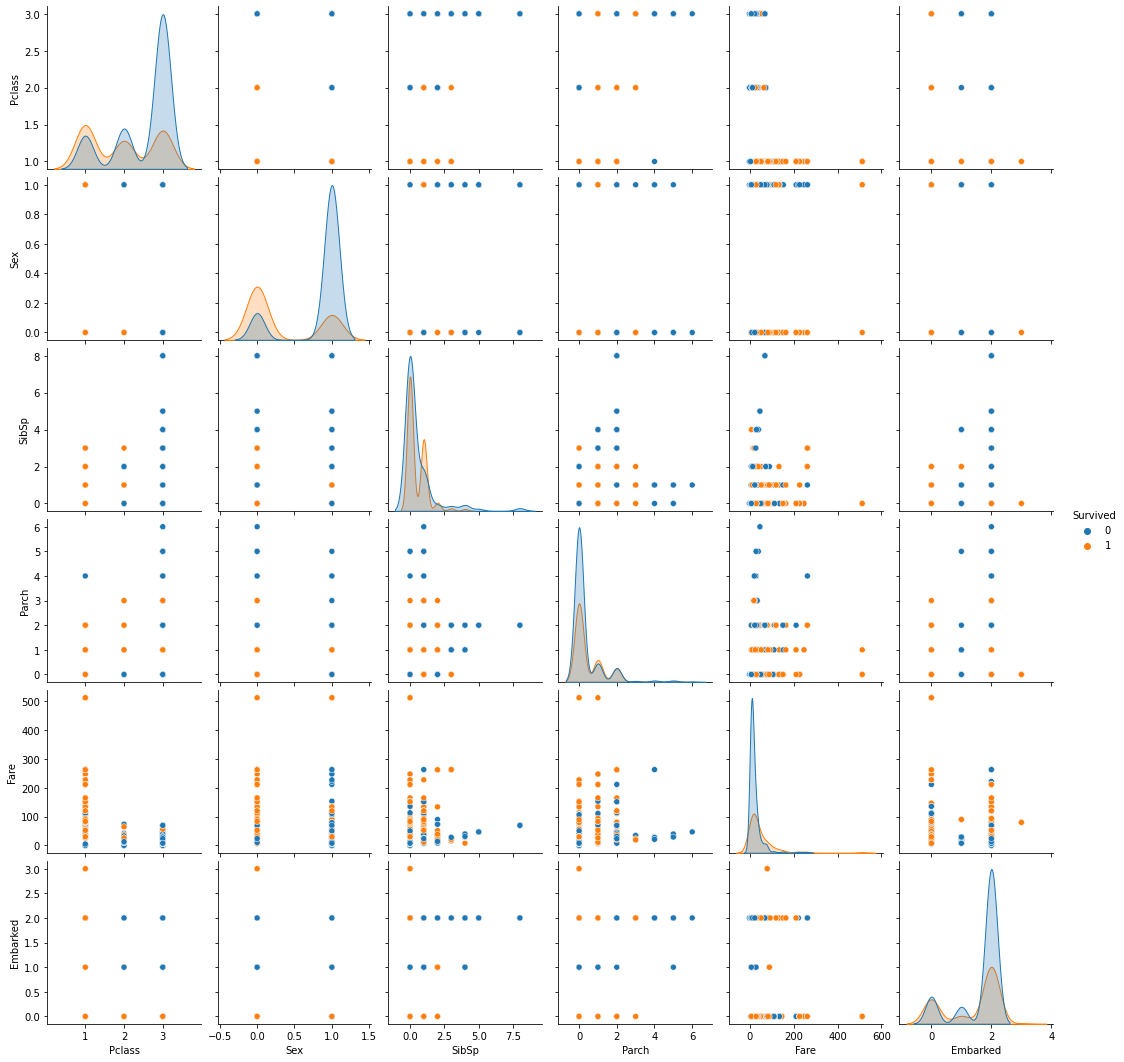

In [ ]:
#1데이터로드
import pandas as pd #판다스를 단축어pd 로 불러옴
from sklearn.preprocessing import LabelEncoder # 사이킷런.라벨인코더 불러옴
#트레인파일 불러오기
k = pd.read_csv('train.csv')
#2데이터정리 불필요한 시리즈 제거
k.drop(columns='Name', inplace=True) #인플레이스트루로 바로 원본 수정
k.drop(columns='PassengerId', inplace=True)
k.drop(columns='Ticket', inplace=True)
k.drop(columns='Cabin', inplace=True)
k.drop(columns='Age', inplace=True)
#3라벨인코더 실행 # 컴퓨터가 인지하지 못하는 한글을 숫자로 바꾼다
LE1 = LabelEncoder().fit(k['Sex'])
LE2 = LabelEncoder().fit(k['Embarked'])
k['Sex'] = LabelEncoder().fit_transform(k['Sex'])  # 라벨생성규칙은 ksex시리즈를 핏하고 ksex데이터를 
k['Embarked'] = LabelEncoder().fit(k['Embarked']).transform(k['Embarked'])  #기준으로 라벨시리즈를 생성한다
#4결측지제거
k.dropna(inplace=True)  # 디폴트 axis=0 결측지가 있는 행 전체를 삭제한다
#5인덱스리셋 # 많은데이터를 다루면 인덱스가 바뀌기 쉽다 인덱스를 0부터 다시 지정할 수 있다
k.reset_index(inplace=True,drop=True)  # 드롭트루를 사용하여 기존 인덱스를 전부 지운다
                                       #드롭 트루가 없을 경우 기존 인덱스는 'index' 시리즈를 만들며 빠져나온다
#6그래프확인
import seaborn as sns #시본을 단축어 sns로 부른다
sns.pairplot(k, hue='Survived')  # 시본 페어플롯으로 k데이터의 survived값을 결과로 본다
#7 정답 정리
Y=k['Survived']
#8. 입력값 정리
X=k.drop(columns='Survived')
#9 둘의 행값 같은지 비교
X.shape, Y.shape

In [ ]:
# 딥러닝
from tensorflow import keras   # 10. 케라스 로드   케라스: 딥러닝 프레임워크

dense1 = keras.layers.Dense(100,activation='relu',input_shape=(6,))  # 11. 딥러닝 모델 생성
dense2 = keras.layers.Dense(1,activation='sigmoid')
model=keras.Sequential([dense1,dense2])

model.compile(loss='binary_crossentropy',metrics='accuracy')    # 12. 학습방법 설정 및 학습
model.fit(X,Y,epochs=500)


Epoch 1/500
28/28 [==============================] - 1s 2ms/step - loss: 2.8929 - accuracy: 0.4860
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5780
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6857
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.6891
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.6902
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.6970
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7160
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.7183
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7363
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7452
Epoch 11/

In [ ]:

test=pd.read_csv('test.csv')                               # 13. test파일 전처리

test.drop(columns='Name',inplace=True)        
test.drop(columns='Ticket',inplace=True)
test.drop(columns='Cabin',inplace=True)
test.drop(columns='PassengerId',inplace=True)
test.drop(columns='Age',inplace=True)

test['Sex']= LE1.transform(test['Sex'])
test['Embarked']= LE2.transform(test['Embarked'])
test

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,1,0,0,7.8292,1
1,3,0,1,0,7.0000,2
2,2,1,0,0,9.6875,1
3,3,1,0,0,8.6625,2
4,3,0,1,1,12.2875,2
...,...,...,...,...,...,...
413,3,1,0,0,8.0500,2
414,1,0,0,0,108.9000,0
415,3,1,0,0,7.2500,2
416,3,1,0,0,8.0500,2
